In [2]:
# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')


# Handle table-like data and matrices :
import numpy as np
import pandas as pd
import math 
import itertools



# Modelling Algorithms :

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [3]:
# Modelling Helpers
from sklearn.preprocessing import Normalizer, scale
from sklearn.impute import SimpleImputer  # Updated from Imputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

# Evaluation Metrics
# Regression
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error

# Classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [4]:
#evaluation metrics :

# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  


# Deep Learning Libraries
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from keras.utils import to_categorical

In [5]:
# Evaluation Metrics

# Regression
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error

# Classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Deep Learning Libraries
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Updated import

In [6]:
# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import missingno as msno



# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)

In [7]:
# Center all plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""");

# Make Visualizations better
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plt.rcParams.update(params)

In [8]:
train = pd.read_csv('C:\\Users\\HP\\Downloads\\archive (4)\\fashion-mnist_train.csv')
test = pd.read_csv('C:\\Users\\HP\\Downloads\\archive (4)\\fashion-mnist_train.csv')
df = train.copy()
df_test = test.copy()

In [9]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
print('Train: ', df.shape)
print('Test: ', df_test.shape)

Train:  (60000, 785)
Test:  (60000, 785)


In [11]:
df.label.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1], dtype=int64)

In [12]:
df.isnull().any().sum()

0

In [13]:
df_test.isnull().any().sum()

0

## Data Visualization and Preprocessing

In [14]:
# Mapping Classes
clothing = {0 : 'T-shirt/top',
            1 : 'Trouser',
            2 : 'Pullover',
            3 : 'Dress',
            4 : 'Coat',
            5 : 'Sandal',
            6 : 'Shirt',
            7 : 'Sneaker',
            8 : 'Bag',
            9 : 'Ankle boot'}

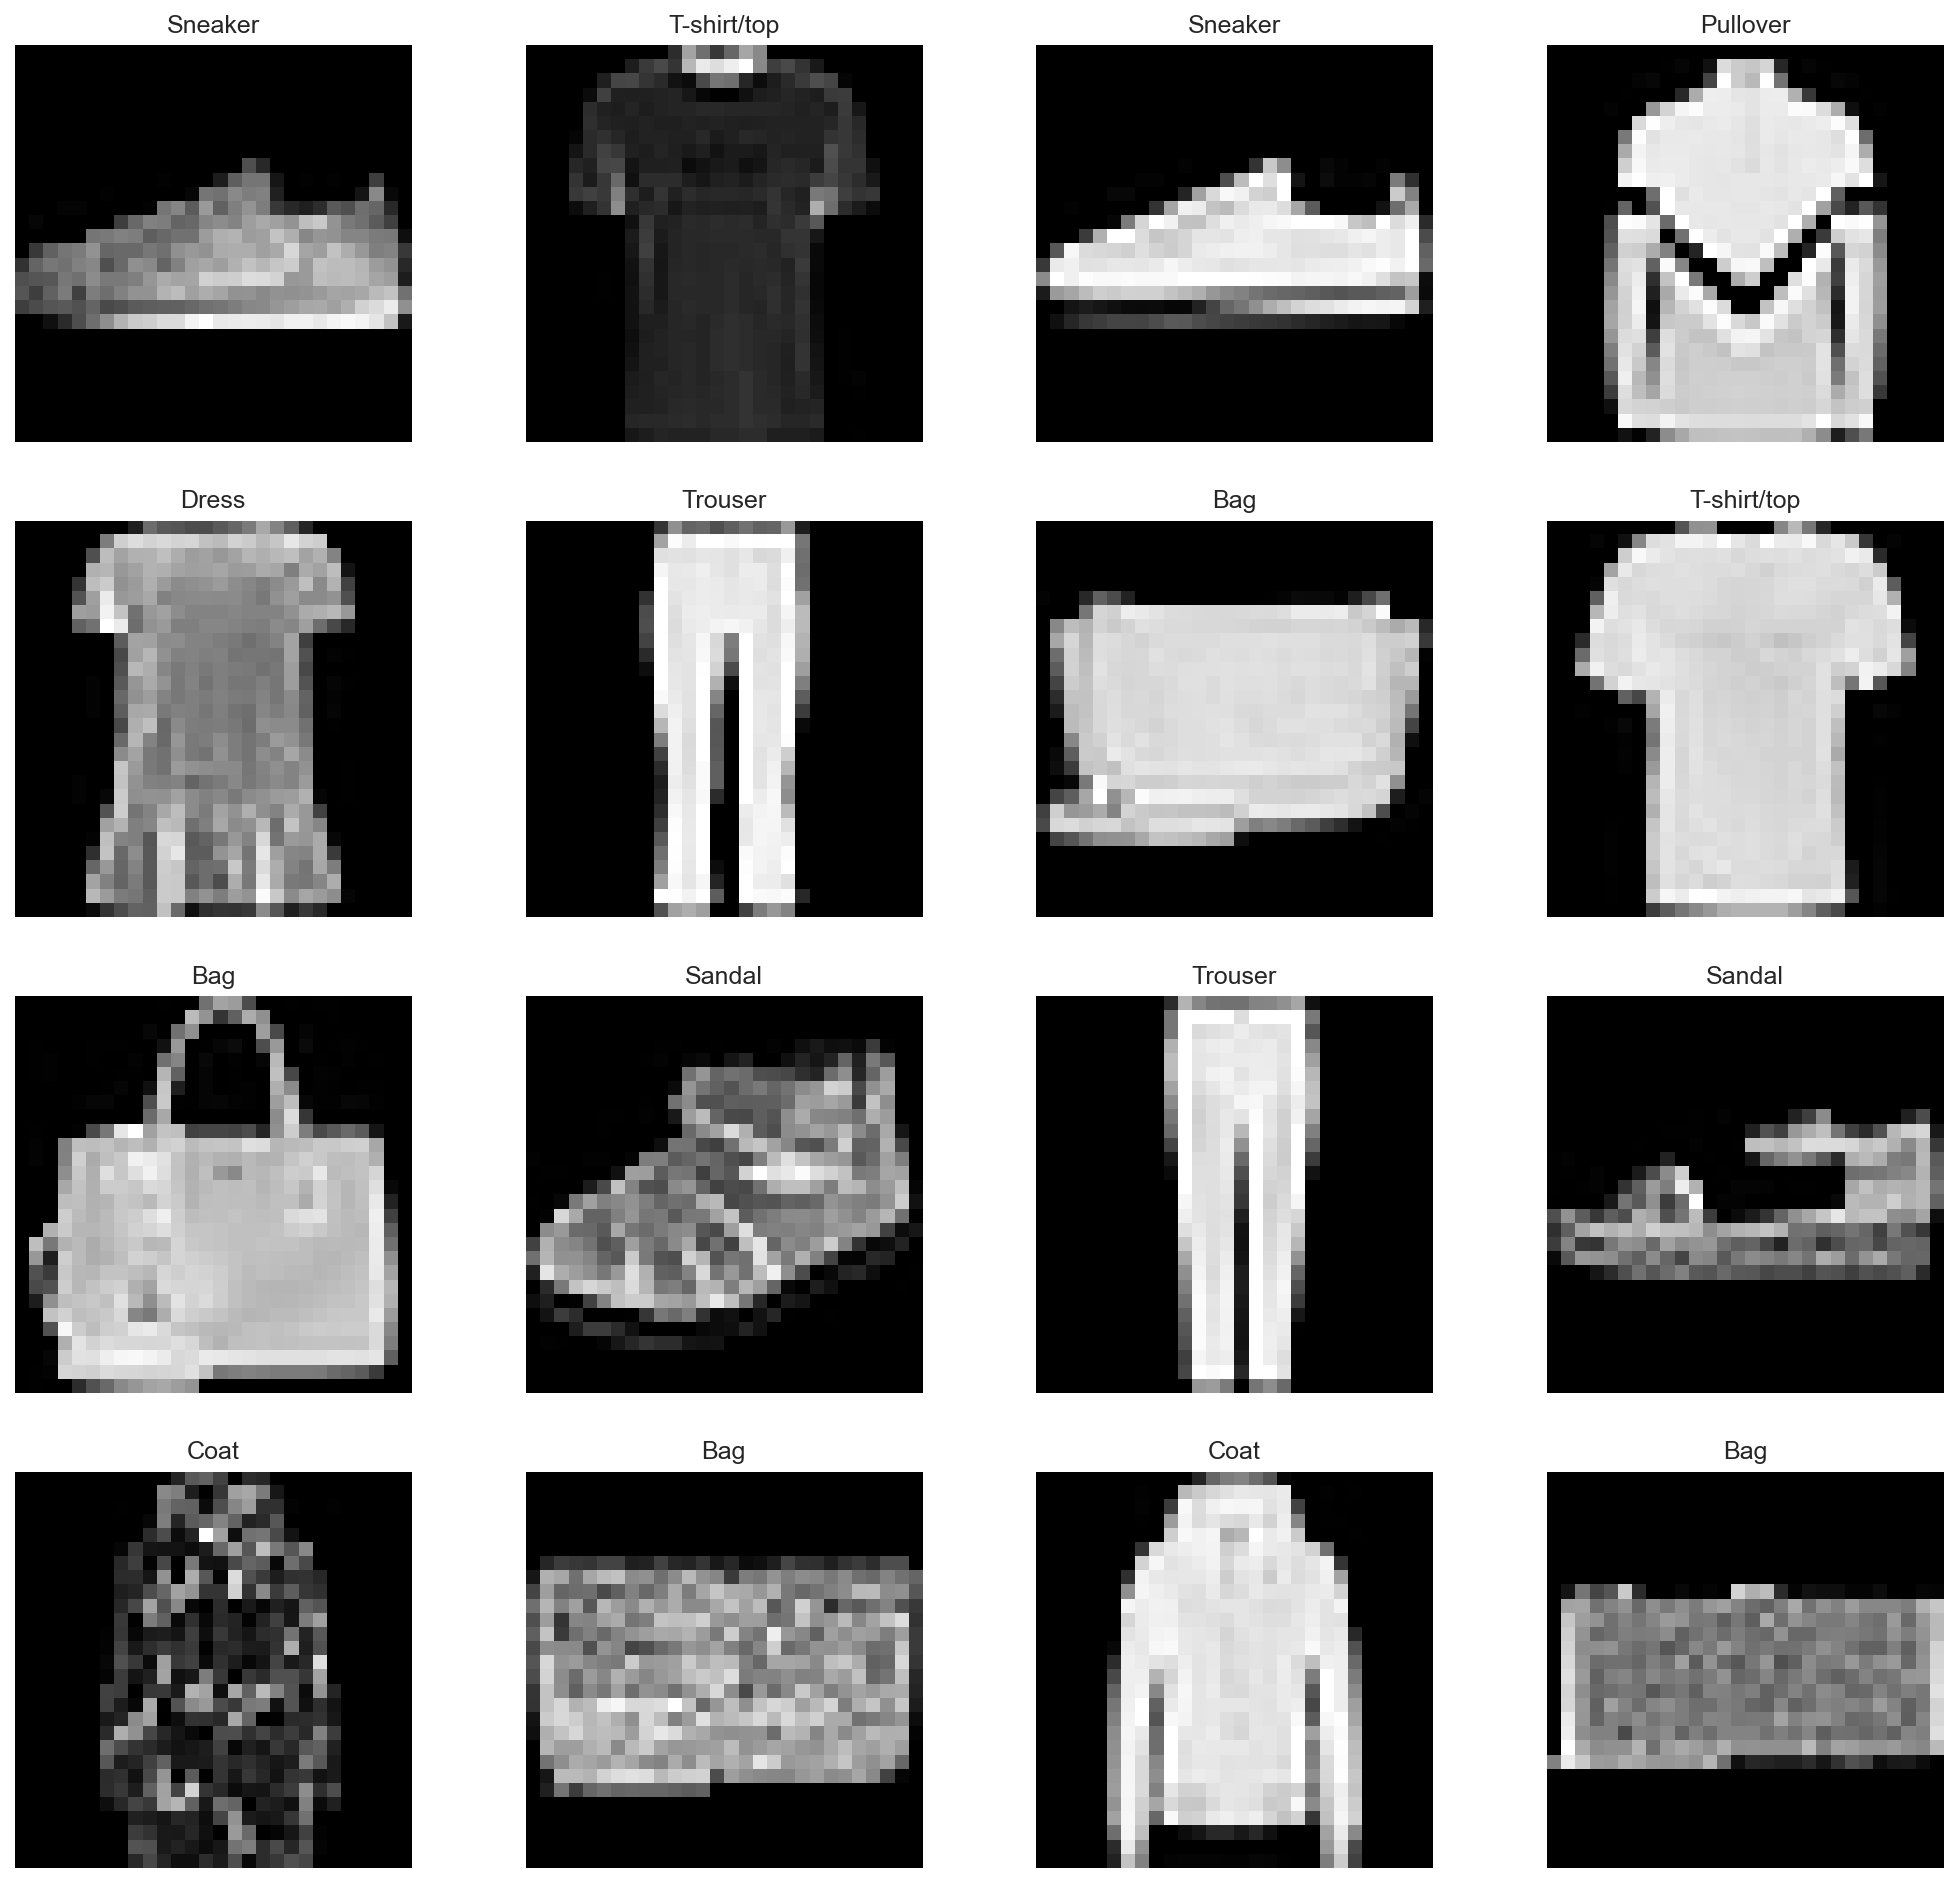

In [15]:
fig, axes = plt.subplots(4, 4, figsize = (15,15))
for row in axes:
    for axe in row:
        index = np.random.randint(60000)
        img = df.drop('label', axis=1).values[index].reshape(28,28)
        cloths = df['label'][index]
        axe.imshow(img, cmap='gray')
        axe.set_title(clothing[cloths])
        axe.set_axis_off()

In [16]:
df['label'].value_counts()

label
2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: count, dtype: int64

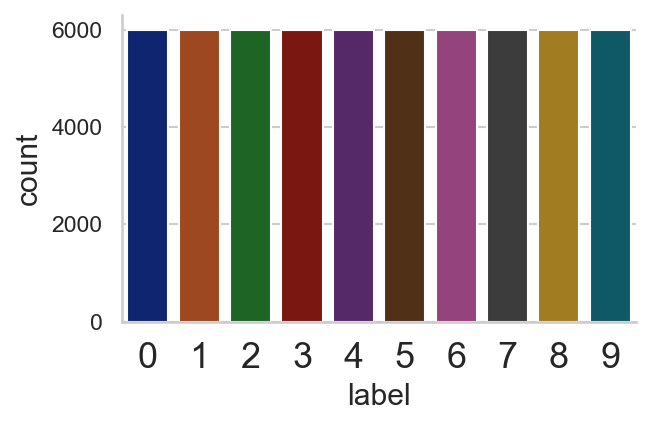

In [17]:
sns.catplot(x='label', data=df, kind='count', height=3, aspect=1.5)

Data PreProcessing

In [18]:
# Setting Random Seeds for Reproducibilty.
seed = 66
np.random.seed(seed)

In [19]:
X = train.iloc[:,1:]
Y = train.iloc[:,0]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=seed)

In [20]:
# The first parameter in reshape indicates the number of examples.
# We pass it as -1, which means that it is an unknown dimension and we want numpy to figure it out.

# reshape(examples, height, width, channels)
x_train = x_train.values.reshape((-1, 28, 28, 1))
x_test = x_test.values.reshape((-1, 28, 28, 1))

df_test.drop('label', axis=1, inplace=True)
df_test = df_test.values.reshape((-1, 28, 28, 1))

In [21]:
# You need to make sure that your Image is cast into double/float from int before you do this scaling 
# as you will most likely generate floating point numbers.
# And had it been int, the values will be truncated to zero.

x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255
df_test = df_test.astype("float32")/255

In [22]:
#One Hot Encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [23]:
print(y_train.shape)
print(y_test.shape)

(54000, 10)
(6000, 10)


## Model Architecture and Development:

In [24]:
# Building a ConvNet
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last', input_shape=(28,28,1)))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
    
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [25]:
# Optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )

In [26]:
# Compiling the model
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 28, 28, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        1

In [28]:
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [29]:
datagen = ImageDataGenerator(
        rotation_range = 8,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        shear_range = 0.3,# shear angle in counter-clockwise direction in degrees  
        width_shift_range=0.08,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.08,  # randomly shift images vertically (fraction of total height)
        vertical_flip=True)  # randomly flip images

In [30]:
datagen.fit(x_train)

## Data Training

In [31]:
batch_size = 110
epochs = 30

In [32]:
# Fit the Model
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size), epochs = epochs, 
                              validation_data = (x_test, y_test), verbose=2, 
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks = [reduce_lr])

Epoch 1/30



490/490 - 99s - loss: 0.8239 - accuracy: 0.7064 - val_loss: 1.7323 - val_accuracy: 0.4583 - lr: 0.0010 - 99s/epoch - 202ms/step
Epoch 2/30
490/490 - 71s - loss: 0.5523 - accuracy: 0.7970 - val_loss: 0.3773 - val_accuracy: 0.8607 - lr: 9.0000e-04 - 71s/epoch - 144ms/step
Epoch 3/30
490/490 - 71s - loss: 0.4775 - accuracy: 0.8280 - val_loss: 0.3533 - val_accuracy: 0.8695 - lr: 8.1000e-04 - 71s/epoch - 145ms/step
Epoch 4/30
490/490 - 72s - loss: 0.4276 - accuracy: 0.8471 - val_loss: 0.3200 - val_accuracy: 0.8775 - lr: 7.2900e-04 - 72s/epoch - 146ms/step
Epoch 5/30
490/490 - 71s - loss: 0.4070 - accuracy: 0.8532 - val_loss: 0.3002 - val_accuracy: 0.8912 - lr: 6.5610e-04 - 71s/epoch - 144ms/step
Epoch 6/30
490/490 - 71s - loss: 0.3873 - accuracy: 0.8611 - val_loss: 0.2826 - val_accuracy: 0.8973 - lr: 5.9049e-04 - 71s/epoch - 145ms/step
Epoch 7/30
490/490 - 71s - loss: 0.3697 - accuracy: 0.8673 - val_loss: 0.2770 - val_accuracy: 0.8968 - lr: 5.3144e-04 - 71s/epoch - 144ms/step
Epoch 8/30
490

In [33]:
score = model.evaluate(x_test, y_test)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

188/188 [==============================] - 2s 8ms/step - loss: 0.2031 - accuracy: 0.9267
Loss: 0.2031
Accuracy: 0.9267


## Performance Evaluation

In [34]:
score = model.evaluate(x_test, y_test)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

188/188 [==============================] - 2s 8ms/step - loss: 0.2031 - accuracy: 0.9267
Loss: 0.2031
Accuracy: 0.9267


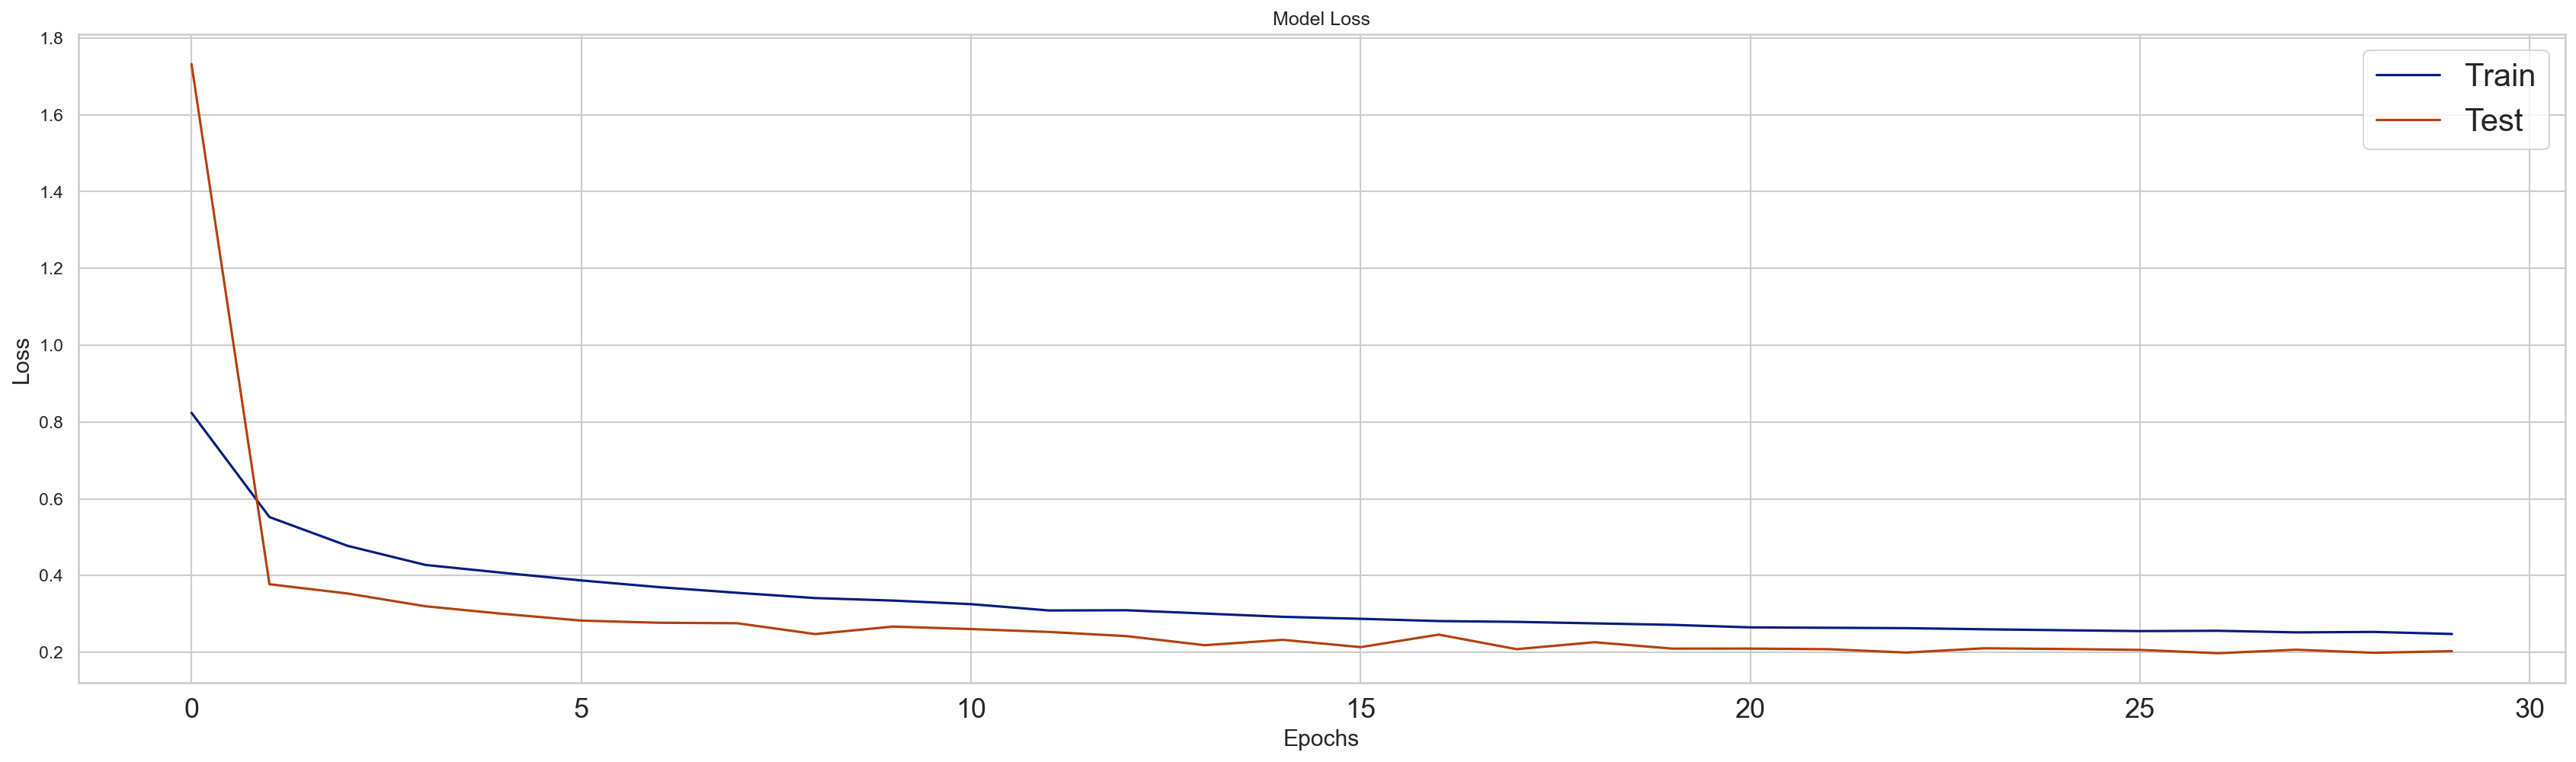

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

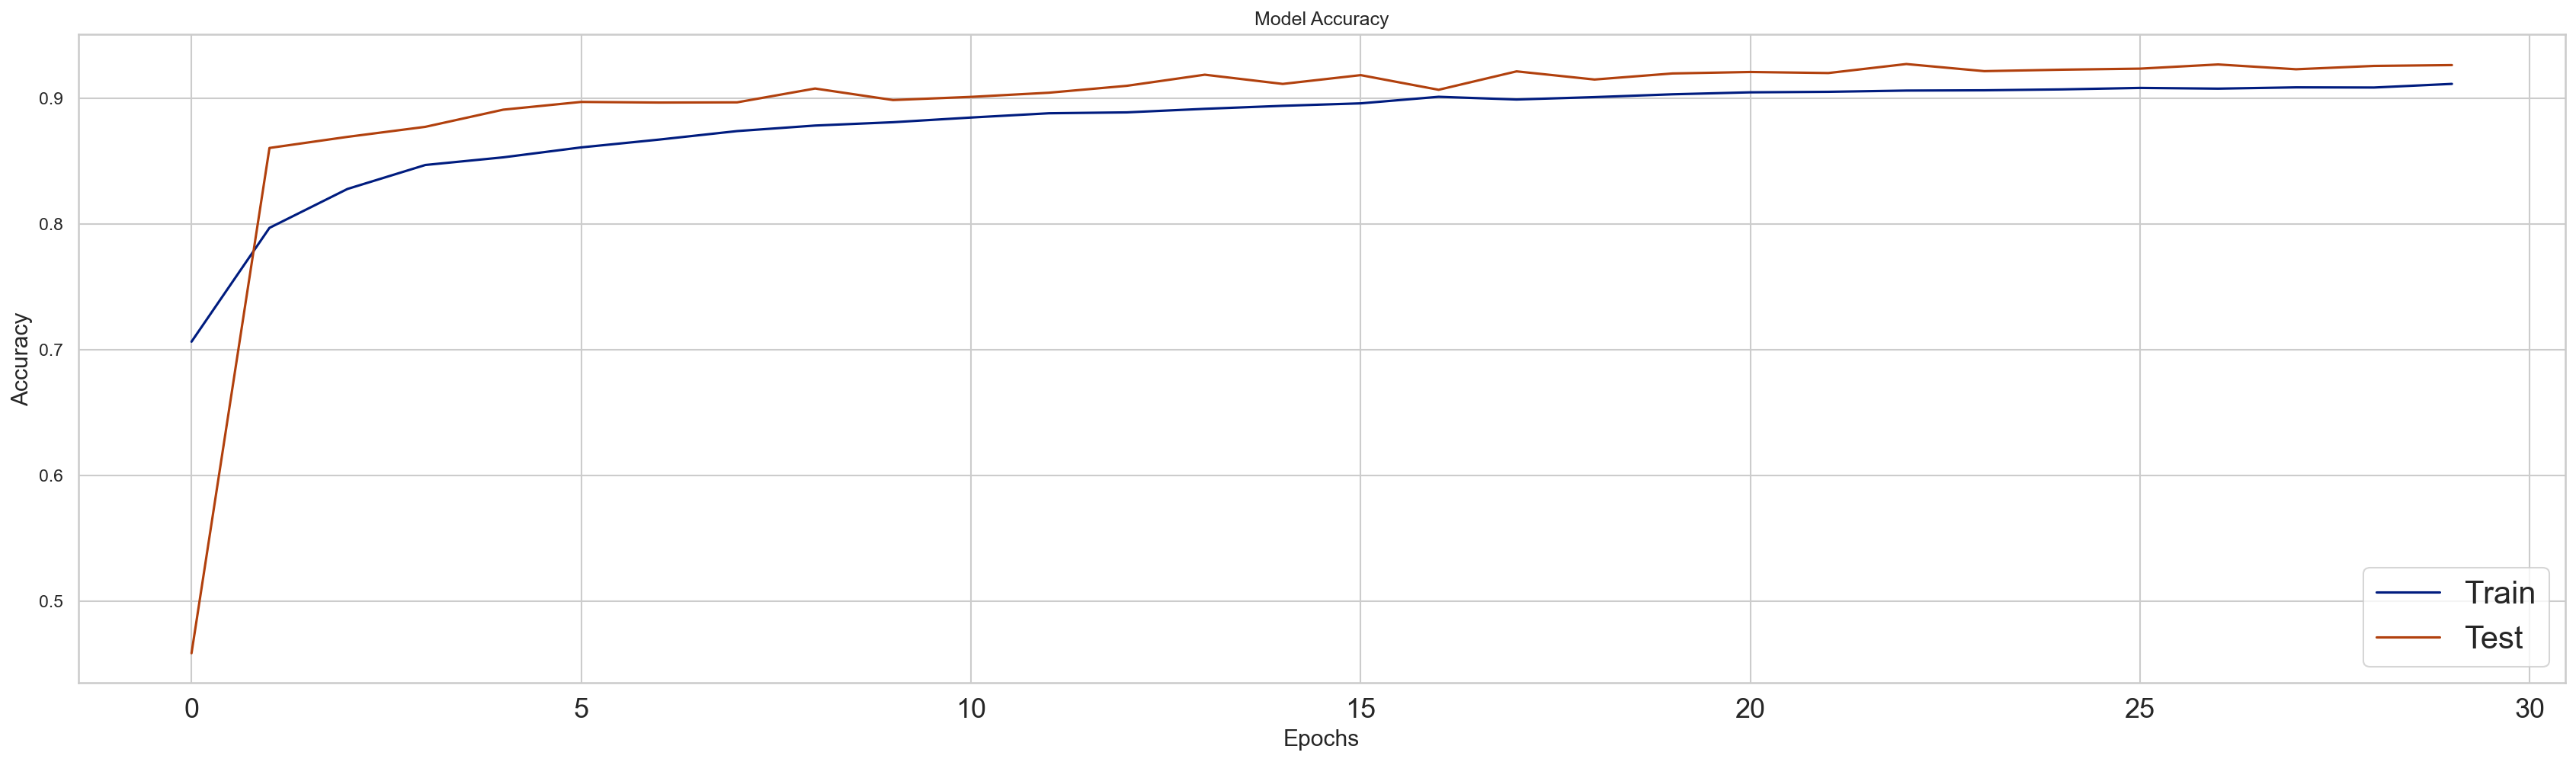

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

In [37]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

188/188 [==============================] - 2s 8ms/step


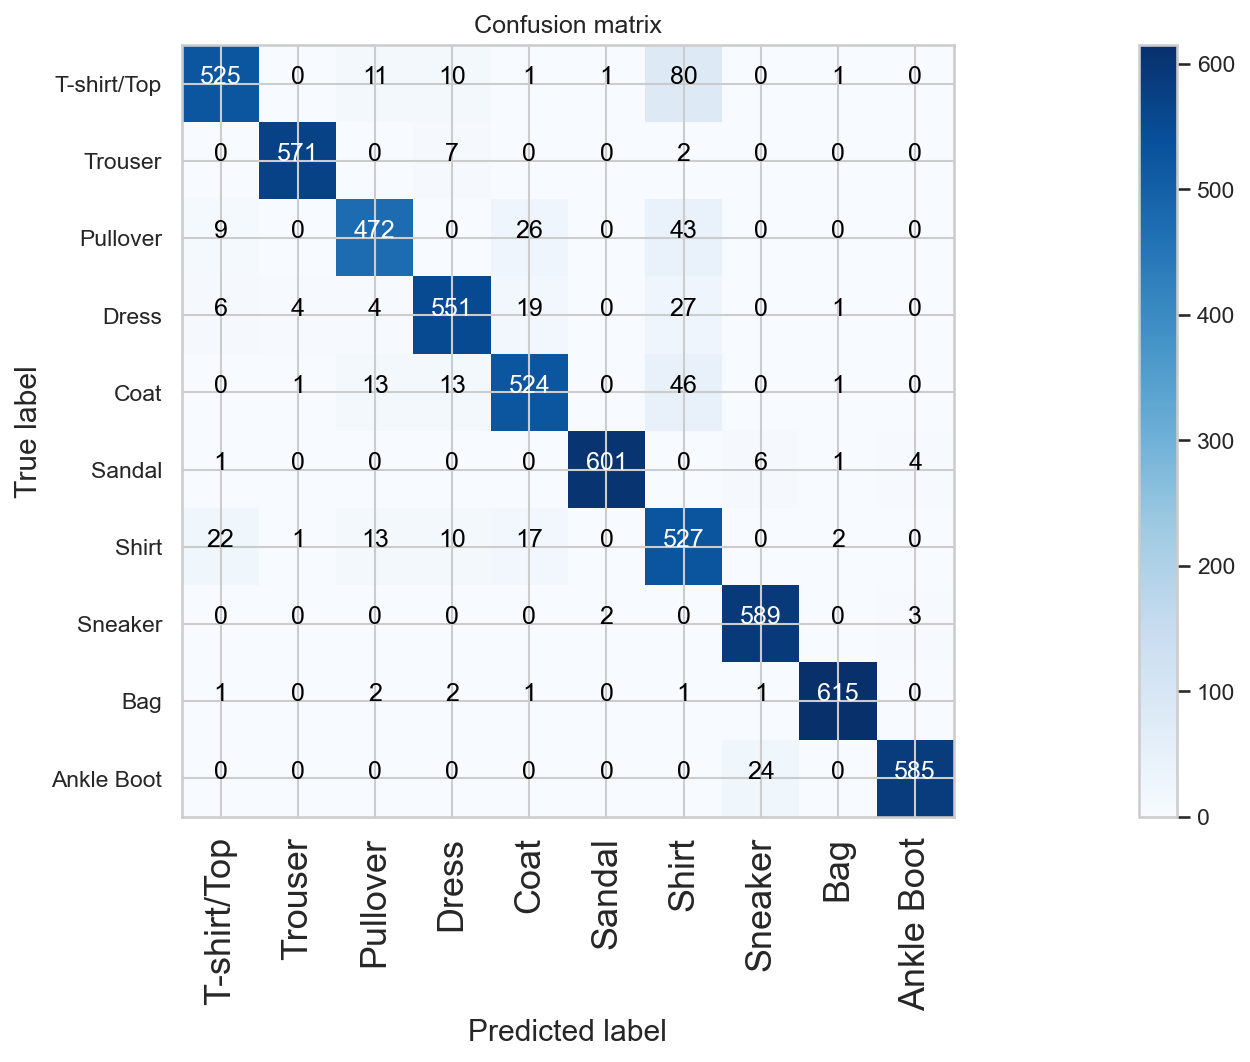

In [38]:
# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, 
            classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'])

In [41]:
classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
print(classification_report(Y_true, Y_pred_classes, target_names = classes))

              precision    recall  f1-score   support

 T-shirt/Top       0.93      0.83      0.88       629
     Trouser       0.99      0.98      0.99       580
    Pullover       0.92      0.86      0.89       550
       Dress       0.93      0.90      0.91       612
        Coat       0.89      0.88      0.88       598
      Sandal       1.00      0.98      0.99       613
       Shirt       0.73      0.89      0.80       592
     Sneaker       0.95      0.99      0.97       594
         Bag       0.99      0.99      0.99       623
  Ankle Boot       0.99      0.96      0.97       609

    accuracy                           0.93      6000
   macro avg       0.93      0.93      0.93      6000
weighted avg       0.93      0.93      0.93      6000



In [42]:
X = df_test
Y = to_categorical(test.iloc[:,0])

In [43]:
score = model.evaluate(X, Y)

print("Loss: {:.4f}".format(score[0]))
print("Accuracy: {:.4f}".format(score[1]))

1875/1875 [==============================] - 18s 9ms/step - loss: 0.1760 - accuracy: 0.9350
Loss: 0.1760
Accuracy: 0.9350


## Our model predicted 94% of Test Images correctly, which indicates that the model did pretty good job in generalizing the data.